# BIKE SHARING ASSIGNMENT

***Problem Statement***  <br>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br>
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. <br><br>
***The company wants to know:***<br>
 1. Which variables are significant in predicting the demand for shared bikes. <br>
 2. How well those variables describe the bike demands

The steps to be followed in this exercise are as follows: <br>

1. Reading, understanding
2. Visualizing the data<br>
3. Preparing the data for model training (train-test split, rescaling)<br>
4. Training the model<br>
5. Residual analysis<br>
6. Prediction and evaluation of the test set

### Regression Analysis

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')

### STEP 1 - READING AND UNDERSTANDING THE DATA

In [2]:
#Reading a csv file
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


dteday is of type object 

In [4]:
#number of rows and columns in the dataset
bike.shape

(730, 16)

In [5]:
#number of columns in dataset
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#checking for the null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no columns with null values

In [7]:
#statistical summarry of all the columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We observe that all the values are within ranges, and no outliers removal is needed

In [8]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking for unique values in the data

In [9]:
unique_col = [x for x in bike.columns if bike[x].nunique() == len(bike)]
unique_col

['instant', 'dteday']

#### DROPPING THE COLUMNS <br>
1. ***INSTANT*** -  it is a row number not helpful in modelling <br>
2. ***CASUAL AND REGISTERD*** - the target variable is cnt <br>
3. ***dteday*** - it is divided into sub columns yr, month .Thus, dropping this column

In [10]:
bike.drop(columns=['instant','casual','registered','dteday'],inplace =True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### STEP 2 - VISUALIZATION OF DATA

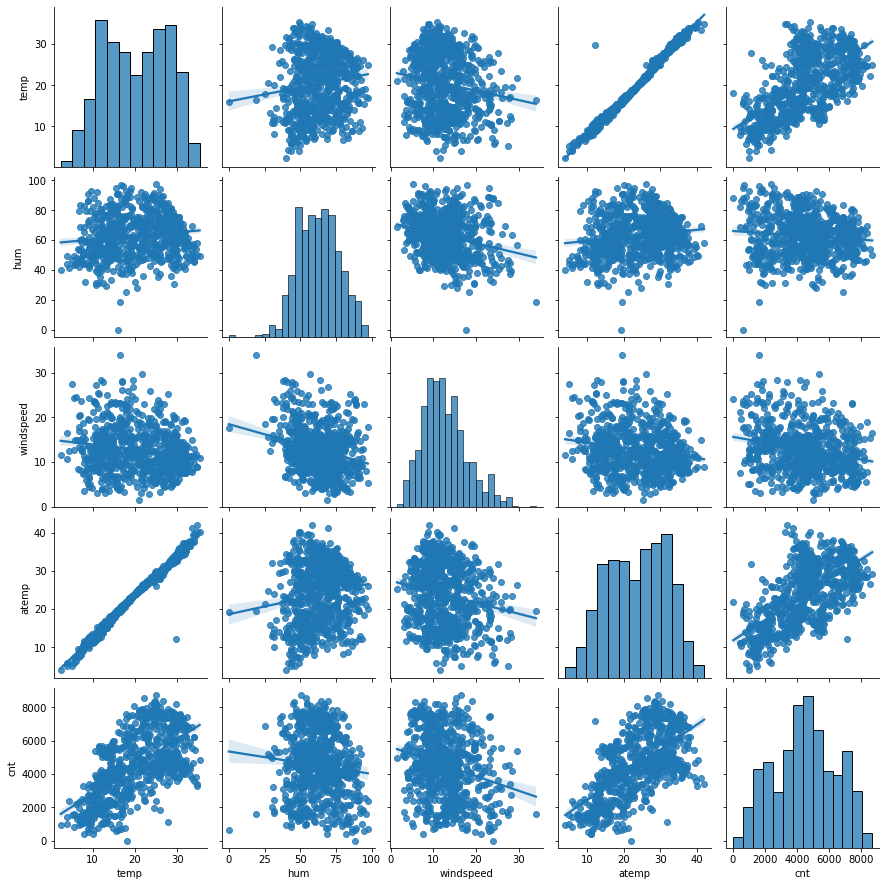

In [11]:
#pairplots to undrstand the linear dependence upon independent vaariables
sns.pairplot(bike, vars=["temp", "hum",'windspeed','atemp','cnt'], kind='reg')
plt.show()

There is linear dependency between atemp,temp and count

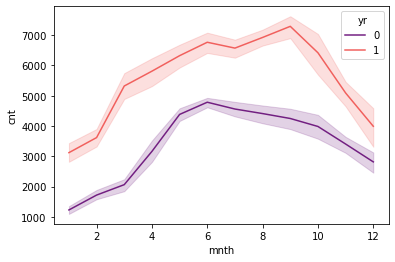

In [12]:
#line graph for plot of count vs month for year 2018 2019
sns.lineplot(x='mnth',y="cnt", data=bike, hue = 'yr', palette = 'magma')
plt.show()

* We observe that the target variable cnt has increased from 2018 to 2019.
* There is a upsurge in demand of bikes from May to Oct for year 2018 to 2019
* No outliers are present

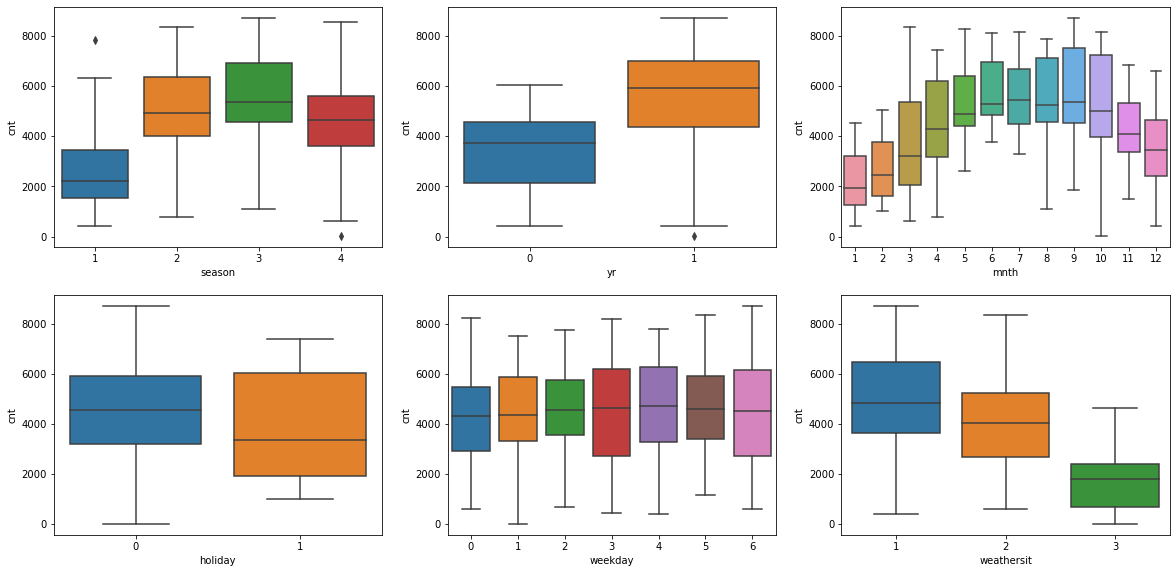

In [13]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.show()

#### INFERENCE FROM THE  CATEGORICAL VARIABLE ANALYSIS <BR>
* Year: The business consistently sees growth in its user base year after year.
* Month: There's a positive trend in customer numbers during Summer, Fall, and Winter months.
* Season: There's a noticeable uptick in customer numbers during 2-Summer,3- Fall, and 4-Winter.
* Holiday: User counts tend to be more varied on holidays compared to normal days when user numbers are higher.
* Weathersit: Clearer weather conditions correlate with an increase in bike users, whereas misty or cloudy conditions see a decrease.

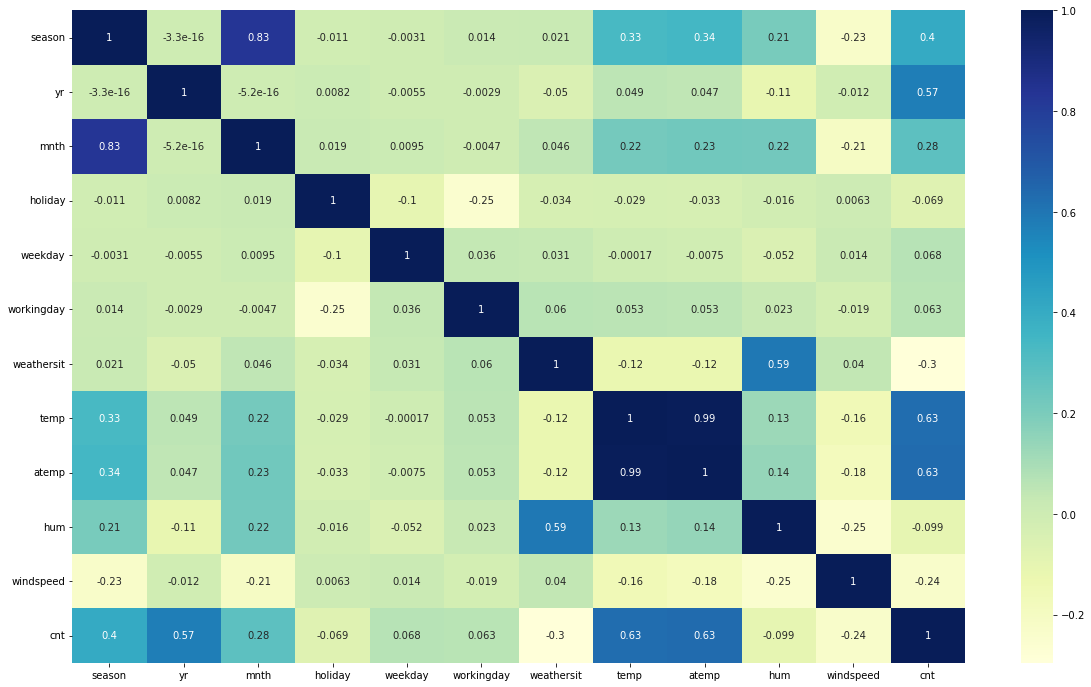

In [14]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike.corr(), annot=True, cmap='YlGnBu')
plt.show()


#### INFERENCES FROM HEATMAP
* Target variable (cnt) has highest correlation with temp (0.63 approx), atemp (0.63 approx) followed by yr(0.57 approx)
* Temp and atemp are very strongly correlated one can be dropped to avoid multicollinearity
* Count('cnt') is negatively correlated with 'windspeed' (-0.24 approx)
* holiday,hum and windspeed are negatively correlated
* There is a weak negative correlation between humidity and cnt, the effect of humidity on the target variable(cnt) is considered to be minimal or negligible.



In [15]:
#removing atemp as it is highly correlated with temp
bike.drop('atemp',axis=1,inplace=True)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### STEP 3 - DATA PREPARATION
#### Encoding   categorical data

List of categorical variables:

* season : 1:spring, 2:summer, 3:fall, 4:winter
* yr: 0: 2018, 1:2019
* months : 1 to 12
* holiday : 0 and 1
* workingday : 0 and 1
* weekday : 1 to 6
* weathersit : 1, 2, 3 and 4
* yr, holiday and workingday since they are already in a binary format.

In [17]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
#Assigning string values to different season instead of numeric values.

#1=spring
bike.loc[(bike['season']== 1), 'season'] = 'spring'

#2=summer
bike.loc[(bike['season']== 2), 'season'] = 'summer'

#3=fall
bike.loc[(bike['season']== 3), 'season'] = 'fall'

#4=winter
bike.loc[(bike['season']== 4), 'season'] = 'winter'

In [19]:
#Checking whether the conversion is done properly or not and getting data count on the basis of season
bike['season'].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [21]:
#Year (0:2018, 1:2019)
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [22]:
#Assigning string values to different months instead of numeric values which may misindicate some order to it.

def month(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

bike[['mnth']] = bike[['mnth']].apply(month)

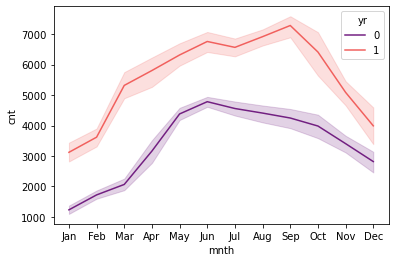

In [23]:
sns.lineplot(x='mnth',y="cnt", data=bike, hue = 'yr', palette = 'magma')
plt.show()

In [24]:
bike['mnth'].astype('category').value_counts()

Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [25]:
#if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
bike['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [26]:
#Assigning string values to weekdays instead of numeric values which may misindicate some order to it.

def days(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs', 5:'Fri', 6:'Sat'})

bike[['weekday']] = bike[['weekday']].apply(days)

In [27]:
bike['weekday'].astype('category').value_counts()

Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tues     104
Wed      103
Name: weekday, dtype: int64

In [28]:
#Replacing long weathersit names into string values for better readability and understanding

bike['weathersit'] = bike['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [29]:
bike['weathersit'].astype('category').value_counts()

Clear                 463
Cloudy_mist           246
Light_Rain_Thunder     21
Name: weathersit, dtype: int64

In [30]:
bike.shape

(730, 11)

#### Converting categorical variables to dummy variables


In [31]:
# creating idummy variables
# Getting dummy variable for season variable
season_dum = pd.get_dummies(bike['season'],drop_first=True)
# Getting dummy variable for month variable
mnth_dum = pd.get_dummies(bike['mnth'],drop_first=True)
# Getting dummy variable for weekday variable
weekday_dum = pd.get_dummies(bike['weekday'],drop_first=True)
# Getting dummy variable for weathersit variable
weathersit_dum = pd.get_dummies(bike['weathersit'],drop_first=True)

In [32]:
# Adding indicator variable columns to the dataset . Dropping original columns
bike = pd.concat([bike,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
bike.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [33]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy_mist,Light_Rain_Thunder
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
bike.shape

(730, 29)

In [35]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   hum                 730 non-null    float64
 5   windspeed           730 non-null    float64
 6   cnt                 730 non-null    int64  
 7   spring              730 non-null    uint8  
 8   summer              730 non-null    uint8  
 9   winter              730 non-null    uint8  
 10  Aug                 730 non-null    uint8  
 11  Dec                 730 non-null    uint8  
 12  Feb                 730 non-null    uint8  
 13  Jan                 730 non-null    uint8  
 14  Jul                 730 non-null    uint8  
 15  Jun                 730 non-null    uint8  
 16  Mar     

### STEP 4- SPLITTING DATA INTO TRAINING SET AND TEST SET

In [36]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(30)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### 4.1 RESCALING THE FEATURES
* use standardization or normalization so all units of the coefficients obtained are all on the same scale.
* Two common ways of rescaling:
   * Min-Max scaling
   * Standardisation (mean-0, sigma-1)
* Using Min-Max method of standardization below

In [38]:
# Import the MinMaxScaler class from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# Checking 5 columns 
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy_mist,Light_Rain_Thunder
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


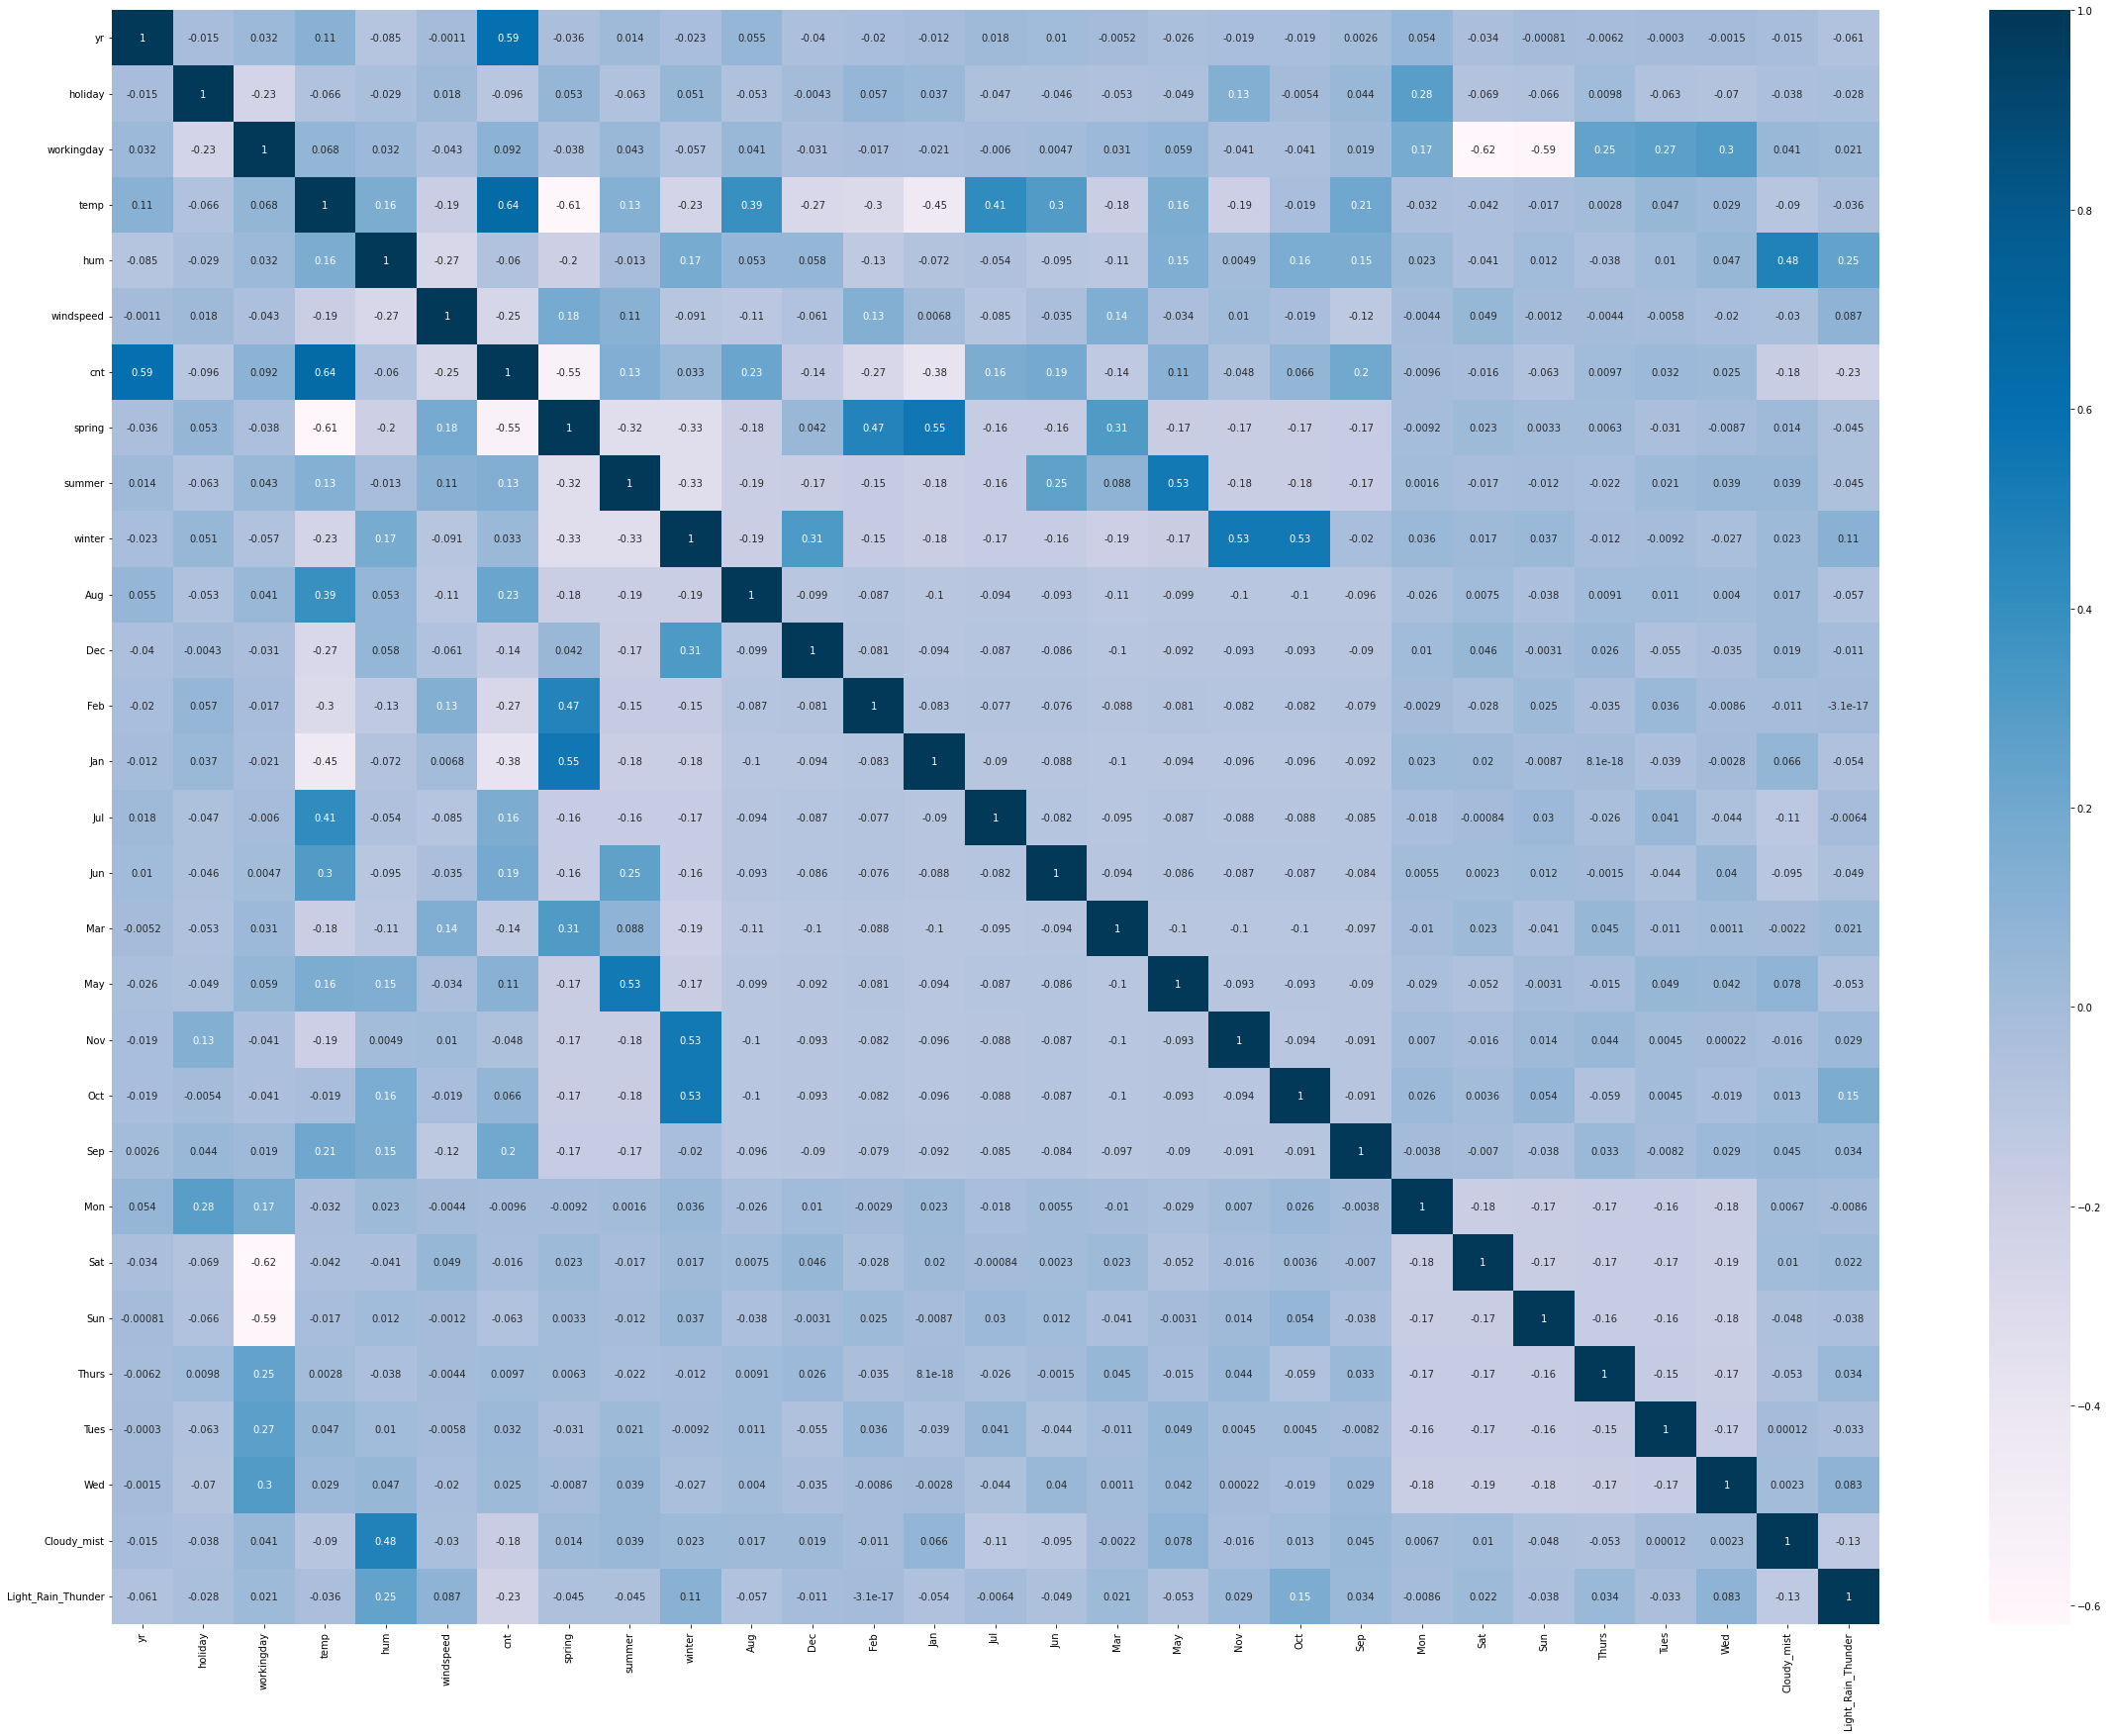

In [40]:
# checking variables that are highly correlated

plt.figure(figsize = (40, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="PuBu")
plt.show()

#### Dividing into X and Y sets for the model building

In [41]:
# Separating the target variable "cnt" from the features in the training data
y_train = df_train.pop("cnt")
X_train = df_train

In [42]:
# y_test = df_test.pop("cnt")
# x_test = df_test

### STEP 5 - BUILDING MODEL

In [43]:
import statsmodels.api as sm 

In [44]:
# Adding Constant
X_train_lm = sm.add_constant(X_train)

In [45]:
# Create a first fitted model
lr1 = sm.OLS(y_train,X_train_lm).fit()

In [46]:
# Check the parameters obtained
lr1.params

const                 0.245085
yr                    0.232116
holiday               0.009959
workingday            0.096884
temp                  0.450562
hum                  -0.151340
windspeed            -0.186453
spring               -0.048159
summer                0.038725
winter                0.105847
Aug                   0.014404
Dec                  -0.045586
Feb                  -0.032282
Jan                  -0.062777
Jul                  -0.040350
Jun                  -0.002972
Mar                   0.001045
May                   0.023940
Nov                  -0.041851
Oct                   0.007534
Sep                   0.081060
Mon                  -0.020907
Sat                   0.096389
Sun                   0.041853
Thurs                -0.009237
Tues                 -0.018890
Wed                  -0.005388
Cloudy_mist          -0.061066
Light_Rain_Thunder   -0.257443
dtype: float64

In [47]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          8.74e-182
Time:                        22:08:30   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2451      0.035      6.955      0.000       0.176       0.314
yr                     0.2321      0.008     28.820      0.000       0.216       0.248
holiday                0.0100      0.024      0.415      0.678      -0.037       0.057
workingday             0.0969      0.012      7.905      0.000       0.073       0.121
temp                   0.4506      0.046      9.734      0.000       0.360       0.542
hum                   -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed             -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring                -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer                 0.0387      0.026      1.478      0.140      -0.013       0.090
winter                 0.1058      0.028      3.794      0.000       0.051       0.161
Aug                    0.0144      0.034      0.428      0.669      -0.052       0.081
Dec                   -0.0456      0.034     -1.358      0.175      -0.112       0.020
Feb                   -0.0323      0.033     -0.982      0.327      -0.097       0.032
Jan                   -0.0628      0.034     -1.873      0.062      -0.129       0.003
Jul                   -0.0404      0.035     -1.151      0.250      -0.109       0.029
Jun                   -0.0030      0.025     -0.119      0.906      -0.052       0.046
Mar                    0.0010      0.025      0.043      0.966      -0.047       0.049
May                    0.0239      0.021      1.140      0.255      -0.017       0.065
Nov                   -0.0419      0.036     -1.152      0.250      -0.113       0.030
Oct                    0.0075      0.036      0.211      0.833      -0.063       0.078
Sep                    0.0811      0.032      2.533      0.012       0.018       0.144
Mon                   -0.0209      0.015     -1.366      0.173      -0.051       0.009
Sat                    0.0964      0.014      7.029      0.000       0.069       0.123
Sun                    0.0419      0.014      3.006      0.003       0.014       0.069
Thurs                 -0.0092      0.016     -0.595      0.552      -0.040       0.021
Tues                  -0.0189      0.015     -1.219      0.223      -0.049       0.012
Wed                   -0.0054      0.015     -0.362      0.718      -0.035       0.024
Cloudy_mist           -0.0611      0.010     -5.854      0.000      -0.082      -0.041
Light_Rain_Thunder    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):             

* R-squared value is 0.853 while Adj. R-squared:0.845
* These value are good but still we need to make perfect fit model , for this we will going to droping some variables and then check our R squar and R adjusted values to get more precised model.
* For this either we can check droping one by one variable or we can use RFE method for automated Feature selection approach

In [48]:
#significance of variable to drop the variable based on p-values and vif

#### Computing the VIF
VIF = 1/(1-R^2)

In [49]:
#importing library to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [50]:
# vif = pd.DataFrame()
# vif['Features'] = x_train.columns
# vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
# vif['VIF'] = round(vif['VIF'], 2)
# vif = vif.sort_values(by = "VIF", ascending = False)
# vif

- We generally prefer VIF less than 5, there are few variables with VIF > 5
- There are many variables with high VIF and high p_value
- REF Recursive feature elimination can be used to decided right variable

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 

# Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

# Assuming X_train is your feature matrix
rfe = RFE(estimator = lm,n_features_to_select=15)              
rfe = rfe.fit(X_train, y_train)

In [52]:
rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

,Feature,support,Rank
0,yr,True,1
21,Sat,True,1
19,Sep,True,1
26,Cloudy_mist,True,1
12,Jan,True,1
8,winter,True,1
7,summer,True,1
13,Jul,True,1
5,windspeed,True,1
1,holiday,True,1


In [53]:
#selecting columns based of RFE
col= X_train.columns[rfe.support_]
print(len(col))
col


15


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Sep', 'Sat', 'Cloudy_mist',
       'Light_Rain_Thunder'],
      dtype='object')

In [54]:
#variables removed by RFE
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thurs', 'Tues', 'Wed'],
      dtype='object')

In [55]:
#Building model based on only RFE support variables
X_train_rfe = X_train[col]

#### MODEL 2

In [56]:
#VIF Calculation
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [57]:
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
13,Cloudy_mist,2.29
0,yr,2.09
12,Sat,1.98


#### eliminating variables with a VIF > 5; analysis the variables with vif between 5-10

In [58]:
#adding constant to model 2
X_train_lm2 = sm.add_constant(X_train_rfe)

#creating fitted model
lr2 = sm.OLS(y_train,X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          2.31e-191
Time:                        22:08:30   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2510      0.036      6.949      0.000       0.180       0.322
yr                     0.2305      0.008     28.807      0.000       0.215       0.246
holiday               -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday             0.0435      0.012      3.781      0.000       0.021       0.066
temp                   0.5098      0.034     14.851      0.000       0.442       0.577
hum                   -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed             -0.1860      0.025     -7.301      0.000      -0.236      -0.136
spring                -0.0508      0.021     -2.461      0.014      -0.091      -0.010
summer                 0.0497      0.015      3.346      0.001       0.020       0.079
winter                 0.0944      0.017      5.479      0.000       0.061       0.128
Jan                   -0.0343      0.017     -1.980      0.048      -0.068      -0.000
Jul                   -0.0532      0.018     -2.947      0.003      -0.089      -0.018
Sep                    0.0812      0.016      4.934      0.000       0.049       0.114
Sat                    0.0537      0.014      3.707      0.000       0.025       0.082
Cloudy_mist           -0.0578      0.010     -5.574      0.000      -0.078      -0.037
Light_Rain_Thunder    -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The R-value and adjusted R-value are 0.849 and 0.844 which are good and almost similar to previous values, which means that most features dropped were insignificant
* from VIF table we see humidty has high VIF of 29.40 , thus we need to remove it
* always check for high p value and next high vif value


Removing ***hum*** variable due to high VIF

In [59]:
X_train_rfe2 = X_train_rfe.drop(["hum"],axis =1)
X_train_rfe2.head()

,yr,holiday,workingday,temp,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Cloudy_mist,Light_Rain_Thunder
653,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,1,0


In [60]:
calculateVIF(X_train_rfe2)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,spring,3.08
6,summer,2.33
0,yr,2.08
7,winter,1.99
11,Sat,1.97
8,Jan,1.62
9,Jul,1.59


#### MODEL 3

In [61]:
#adding constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

#creating fitted model
lr3 = sm.OLS(y_train,X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          7.33e-189
Time:                        22:08:30   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1737      0.031      5.525      0.000       0.112       0.235
yr                     0.2344      0.008     29.019      0.000       0.218       0.250
holiday               -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday             0.0465      0.012      3.983      0.000       0.024       0.069
temp                   0.4728      0.034     14.037      0.000       0.407       0.539
windspeed             -0.1563      0.025     -6.292      0.000      -0.205      -0.107
spring                -0.0597      0.021     -2.861      0.004      -0.101      -0.019
summer                 0.0434      0.015      2.890      0.004       0.014       0.073
winter                 0.0797      0.017      4.650      0.000       0.046       0.113
Jan                   -0.0389      0.018     -2.215      0.027      -0.073      -0.004
Jul                   -0.0482      0.018     -2.635      0.009      -0.084      -0.012
Sep                    0.0753      0.017      4.522      0.000       0.043       0.108
Sat                    0.0584      0.015      3.980      0.000       0.030       0.087
Cloudy_mist           -0.0826      0.009     -9.592      0.000      -0.100      -0.066
Light_Rain_Thunder    -0.2917      0.024    -12.027      0.000      -0.339      -0.244
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

temp has a high VIF removing ***temp*** variable reduces r2 drastically, thus removing ***holiday*** with highp value 

In [62]:
# X_train_rfe3 = X_train_rfe2.drop(["temp"],axis =1)
# X_train_rfe3.head()
X_train_rfe3 = X_train_rfe2.drop(["holiday"],axis =1)
X_train_rfe3.head()

,yr,workingday,temp,windspeed,spring,summer,winter,Jan,Jul,Sep,Sat,Cloudy_mist,Light_Rain_Thunder
653,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,0,1,1,0


In [63]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.31
0,yr,2.08
6,winter,1.92
10,Sat,1.84
7,Jan,1.62
8,Jul,1.59


#### MODEL 4

In [64]:
#adding constant
#adding constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

#creating fitted model
lr4 = sm.OLS(y_train,X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          4.11e-189
Time:                        22:08:30   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1656      0.031      5.294      0.000       0.104       0.227
yr                     0.2346      0.008     28.950      0.000       0.219       0.250
workingday             0.0548      0.011      4.992      0.000       0.033       0.076
temp                   0.4730      0.034     13.996      0.000       0.407       0.539
windspeed             -0.1572      0.025     -6.311      0.000      -0.206      -0.108
spring                -0.0605      0.021     -2.892      0.004      -0.102      -0.019
summer                 0.0437      0.015      2.903      0.004       0.014       0.073
winter                 0.0788      0.017      4.587      0.000       0.045       0.113
Jan                   -0.0395      0.018     -2.240      0.026      -0.074      -0.005
Jul                   -0.0472      0.018     -2.570      0.010      -0.083      -0.011
Sep                    0.0734      0.017      4.399      0.000       0.041       0.106
Sat                    0.0669      0.014      4.728      0.000       0.039       0.095
Cloudy_mist           -0.0821      0.009     -9.505      0.000      -0.099      -0.065
Light_Rain_Thunder    -0.2906      0.024    -11.943      0.000      -0.338      -0.243
==============================================================================
Omnibus:                       74.009   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.357
Skew:                          -0.733   Prob(JB):                     7.61e-42
Kurtosis:                       5.600   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing variable ***Jan*** with high p value of 0.024

In [65]:
X_train_rfe4 = X_train_rfe3.drop(["Jan"],axis =1)
X_train_rfe4.head()

,yr,workingday,temp,windspeed,spring,summer,winter,Jul,Sep,Sat,Cloudy_mist,Light_Rain_Thunder
653,1,1,0.509887,0.300794,0,0,1,0,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,0,1,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,0,1,1,0


In [66]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,spring,2.38
5,summer,2.31
0,yr,2.07
6,winter,1.92
9,Sat,1.83
7,Jul,1.58
10,Cloudy_mist,1.56


In [67]:
#adding constant
#adding constant
X_train_lm5 = sm.add_constant(X_train_rfe4)

#creating fitted model
lr5 = sm.OLS(y_train,X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          3.28e-189
Time:                        22:08:31   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1493      0.031      4.886      0.000       0.089       0.209
yr                     0.2338      0.008     28.766      0.000       0.218       0.250
workingday             0.0547      0.011      4.962      0.000       0.033       0.076
temp                   0.4925      0.033     15.020      0.000       0.428       0.557
windspeed             -0.1500      0.025     -6.047      0.000      -0.199      -0.101
spring                -0.0662      0.021     -3.174      0.002      -0.107      -0.025
summer                 0.0469      0.015      3.117      0.002       0.017       0.076
winter                 0.0851      0.017      4.997      0.000       0.052       0.119
Jul                   -0.0489      0.018     -2.657      0.008      -0.085      -0.013
Sep                    0.0738      0.017      4.408      0.000       0.041       0.107
Sat                    0.0666      0.014      4.688      0.000       0.039       0.094
Cloudy_mist           -0.0830      0.009     -9.581      0.000      -0.100      -0.066
Light_Rain_Thunder    -0.2892      0.024    -11.845      0.000      -0.337      -0.241
==============================================================================
Omnibus:                       72.688   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.799
Skew:                          -0.721   Prob(JB):                     4.51e-41
Kurtosis:                       5.581   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Removing variable ***July*** with high p value of 0.008

In [68]:
X_train_rfe5 = X_train_rfe4.drop(["Jul"],axis =1)
X_train_rfe5.head()

,yr,workingday,temp,windspeed,spring,summer,winter,Sep,Sat,Cloudy_mist,Light_Rain_Thunder
653,1,1,0.509887,0.300794,0,0,1,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,1,0
728,1,0,0.245101,0.663106,1,0,0,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,1,0


In [69]:
calculateVIF(X_train_rfe5)

,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,spring,2.30
0,yr,2.07
5,summer,1.99
8,Sat,1.83
6,winter,1.77
9,Cloudy_mist,1.56
7,Sep,1.23


In [70]:
#adding constant
#adding constant
X_train_lm6 = sm.add_constant(X_train_rfe5)

#creating fitted model
lr6 = sm.OLS(y_train,X_train_lm6).fit()
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          6.86e-189
Time:                        22:08:31   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1405      0.031      4.599      0.000       0.081       0.201
yr                     0.2343      0.008     28.664      0.000       0.218       0.250
workingday             0.0557      0.011      5.021      0.000       0.034       0.077
temp                   0.4800      0.033     14.702      0.000       0.416       0.544
windspeed             -0.1501      0.025     -6.014      0.000      -0.199      -0.101
spring                -0.0551      0.021     -2.680      0.008      -0.096      -0.015
summer                 0.0615      0.014      4.370      0.000       0.034       0.089
winter                 0.0972      0.017      5.885      0.000       0.065       0.130
Sep                    0.0872      0.016      5.421      0.000       0.056       0.119
Sat                    0.0669      0.014      4.682      0.000       0.039       0.095
Cloudy_mist           -0.0817      0.009     -9.391      0.000      -0.099      -0.065
Light_Rain_Thunder    -0.2902      0.025    -11.813      0.000      -0.338      -0.242
==============================================================================
Omnibus:                       76.386   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.041
Skew:                          -0.765   Prob(JB):                     5.41e-42
Kurtosis:                       5.569   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing variable ***spring*** with a p value of 0.008

In [71]:
X_train_rfe6 = X_train_rfe5.drop(["spring"],axis =1)
X_train_rfe6.head()

,yr,workingday,temp,windspeed,summer,winter,Sep,Sat,Cloudy_mist,Light_Rain_Thunder
653,1,1,0.509887,0.300794,0,1,0,0,0,0
576,1,1,0.815169,0.264686,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,1,1,0
728,1,0,0.245101,0.663106,0,0,0,0,0,0
482,1,0,0.395666,0.188475,1,0,0,1,1,0


In [72]:
calculateVIF(X_train_rfe6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,Cloudy_mist,1.53
5,winter,1.40
6,Sep,1.20
9,Light_Rain_Thunder,1.08


* All the VIF values are in correct limit thus fullfilling the assumption of Multicollinearity making a valid model

In [73]:
#adding constant
X_train_lm7 = sm.add_constant(X_train_rfe6)

#creating fitted model
lr7 = sm.OLS(y_train,X_train_lm7).fit()
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Fri, 12 Apr 2024   Prob (F-statistic):          1.47e-188
Time:                        22:08:31   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0753      0.019      4.051      0.000       0.039       0.112
yr                     0.2331      0.008     28.382      0.000       0.217       0.249
workingday             0.0563      0.011      5.048      0.000       0.034       0.078
temp                   0.5499      0.020     27.885      0.000       0.511       0.589
windspeed             -0.1552      0.025     -6.201      0.000      -0.204      -0.106
summer                 0.0874      0.010      8.481      0.000       0.067       0.108
winter                 0.1318      0.010     12.760      0.000       0.112       0.152
Sep                    0.0972      0.016      6.181      0.000       0.066       0.128
Sat                    0.0677      0.014      4.710      0.000       0.039       0.096
Cloudy_mist           -0.0813      0.009     -9.292      0.000      -0.099      -0.064
Light_Rain_Thunder    -0.2880      0.025    -11.659      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       68.959   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.793
Skew:                          -0.731   Prob(JB):                     4.02e-34
Kurtosis:                       5.258   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Slight impact on Rsquare and Adjusted R squared but the model has become simpler with 10 variables.
* From the summary and VIF values we can conclude that <br>*NONE OF THE FEATURES IN OUR MODEL ARE RELATED TO ONE OR COMBINATION OF MORE THAN ONE FEATURES,<br> THUS STATISFYING ONE OF THE ASSUMPTIONS OF LINEAR REGRESSION*


### STEP 6 - RESIDUAL ANALYSIS

In [74]:
y_train_pred = lr7.predict(X_train_lm7)
residual = y_train_pred - y_train

#### 6.1 - Normal Distribution of Errors

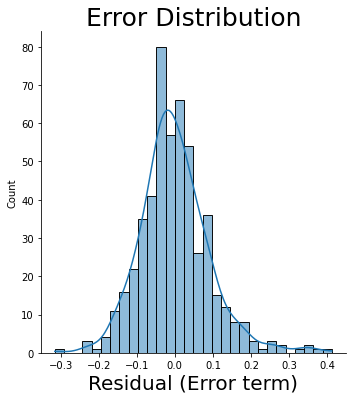

In [75]:
#plot histogram of error terms
sns.displot(residual,kde = True)
plt.xlabel('Residual (Error term)',fontdict={'fontsize':20})
plt.title('Error Distribution',fontdict = {'fontsize': 25 })
plt.show()


* Error term distribution is across 0 validating the assumption of normal distribution of errors around mean of 0. 
* 

#### 6.2 - ERROR TERMS BEING INDEPENDENT

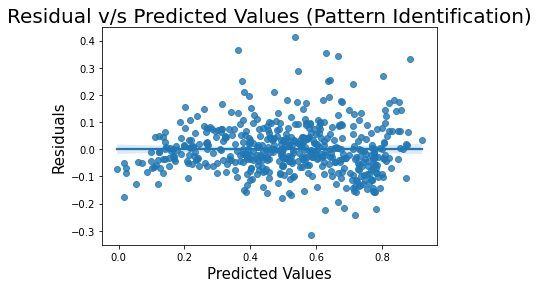

In [76]:
sns.regplot(x=y_train_pred, y = residual)
plt.title('Residual v/s Predicted Values (Pattern Identification)', fontdict={'fontsize':20})
plt.xlabel('Predicted Values',fontdict={'fontsize':15})
plt.ylabel('Residuals',fontdict={'fontsize':15})
plt.show()

* We observe that there is almost no relation between Residual & Predicted value
* For smaller values of predictions, the residual are found to be on higher side
and foccussed above the mean value of 0.

#### 6.3 - Testing for Homoscedasticity

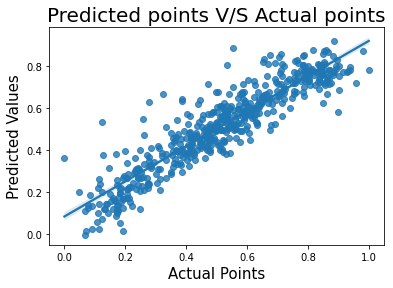

In [77]:
sns.regplot(x=y_train,y =y_train_pred)
plt.title('Predicted points V/S Actual points',fontdict={'fontsize':20})
plt.ylabel('Predicted Values',fontdict={'fontsize':15})
plt.xlabel('Actual Points',fontdict={'fontsize':15})
plt.show()

We observve that variance is similar from both end of fitted line

In [78]:
#Multicorrelation
calculateVIF(X_train_rfe6)

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,Sat,1.69
4,summer,1.57
8,Cloudy_mist,1.53
5,winter,1.40
6,Sep,1.20
9,Light_Rain_Thunder,1.08


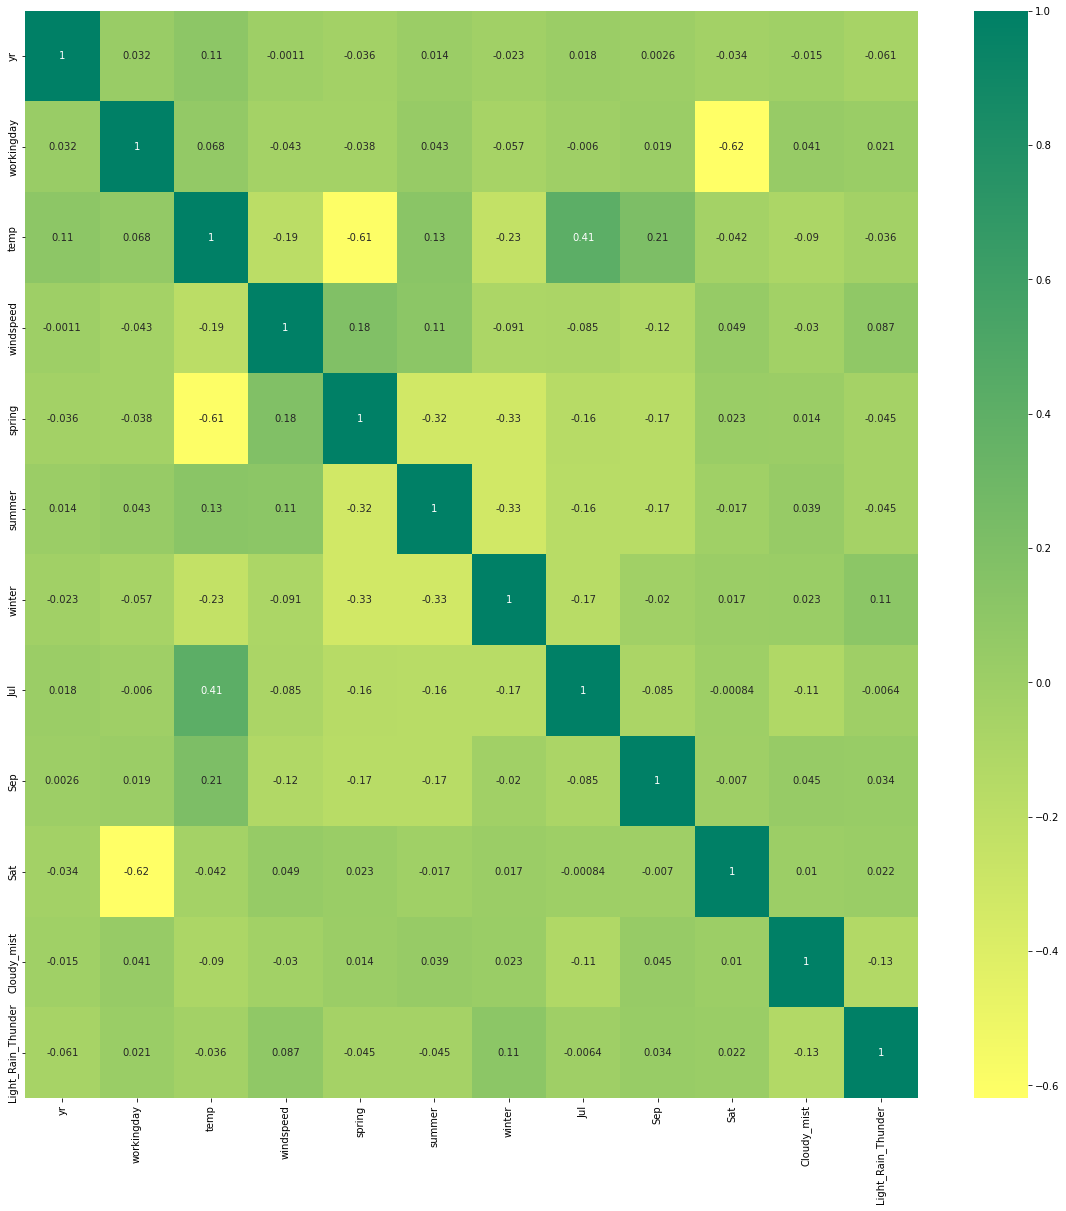

In [79]:
#heatmap plotting
plt.figure(figsize = (20,20))
sns.heatmap(X_train_rfe4.corr(),cmap = 'summer_r', annot =True)
plt.show()

We observe from heatmap no multi colinearity among the independent variables

### STEP 7 - MODEL PREDICTION

In [80]:
num_vars = ['temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy_mist,Light_Rain_Thunder
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tues,Wed,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.319635,0.027397
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#divide into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  219 non-null    int64  
 1   holiday             219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   hum                 219 non-null    float64
 5   windspeed           219 non-null    float64
 6   spring              219 non-null    uint8  
 7   summer              219 non-null    uint8  
 8   winter              219 non-null    uint8  
 9   Aug                 219 non-null    uint8  
 10  Dec                 219 non-null    uint8  
 11  Feb                 219 non-null    uint8  
 12  Jan                 219 non-null    uint8  
 13  Jul                 219 non-null    uint8  
 14  Jun                 219 non-null    uint8  
 15  Mar                 219 non-null    uint8  
 16  May    

In [83]:
X_test = X_test[X_train_rfe6.columns]
#Adding constant variables to test data frame
X_test_lr8 = sm.add_constant(X_test)
X_test_lr8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   yr                  219 non-null    int64  
 2   workingday          219 non-null    int64  
 3   temp                219 non-null    float64
 4   windspeed           219 non-null    float64
 5   summer              219 non-null    uint8  
 6   winter              219 non-null    uint8  
 7   Sep                 219 non-null    uint8  
 8   Sat                 219 non-null    uint8  
 9   Cloudy_mist         219 non-null    uint8  
 10  Light_Rain_Thunder  219 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [84]:
y_test_pred = lr7.predict(X_test_lr8)

In [85]:
round(lr7.params,2)

const                 0.08
yr                    0.23
workingday            0.06
temp                  0.55
windspeed            -0.16
summer                0.09
winter                0.13
Sep                   0.10
Sat                   0.07
Cloudy_mist          -0.08
Light_Rain_Thunder   -0.29
dtype: float64

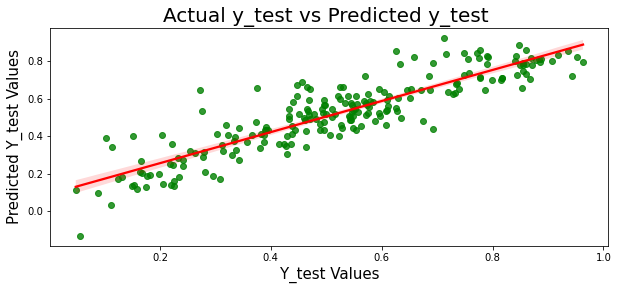

In [86]:
#plotting y_test and y_pred to understand the spread
fig = plt.figure(figsize = (10,4))

#plotting the figure
sns.regplot(x = y_test, y =y_test_pred, scatter_kws ={'color': 'green'}, line_kws={'color': 'red'})

#setting x label, ylabel ,title
plt.title('Actual y_test vs Predicted y_test ',fontdict={'fontsize':20})
plt.xlabel('Y_test Values',fontdict={'fontsize':15})
plt.ylabel('Predicted Y_test Values',fontdict={'fontsize':15})
plt.show()


* Y_test values and Y_test_predicted values show strong visual semblence and hence our prediction are evaluated as healthy fit.

### STEP 8 - GENERATING THE R-SQUARED VALUES

In [87]:
from sklearn.metrics import r2_score
test_r2 = r2_score(y_test,y_test_pred)
test_r2

0.7955844377237248

In [88]:
train_adjusted_r_2 = 0.832
train_r2 = 0.836

In [89]:
#n is number of rows of X
n = X_test.shape[0]

#number of features predictors is shape along axis 1
p = X_test.shape[1]

#we find adjusted r squares using the formula
test_adjusted_r2 = 1-(1-train_r2)*(n-1)/(n-p-1)
test_adjusted_r2

0.8281153846153846

In [90]:
abs(train_r2 - test_r2)

0.040415562276275185

* Train R-squared = 0.836
* Test R-squared = 0.795
* Absolute difference between r2 scores of test and train data is 0.04
* Train Adj R-squared = 0.832
* Test Adj R-squared = 0.828
* Since variation between train and test data prediction r2_score is leass than 5%, model is proven to be dependable enough to be generalizedt
* Final model euation  is <br>
  - y = 0.08 + 0.23 * yr + 0.06 * workingday + 0.55 * temp - 0.16 * windspeed + 0.09 * summer + 0.13 * winter +0.10 * Sept + 0.07 * Sat - 0.08 * Cloudy_mist - 0.29 * Light_Rain_Thunder   

### STEP 9 - FINAL MODEL PREDICTION

In [91]:
Cofficients = round(lr7.params,2)
beta = Cofficients.sort_values(ascending = False)
beta

temp                  0.55
yr                    0.23
winter                0.13
Sep                   0.10
summer                0.09
const                 0.08
Sat                   0.07
workingday            0.06
Cloudy_mist          -0.08
windspeed            -0.16
Light_Rain_Thunder   -0.29
dtype: float64

In [92]:
for i in range(0, len(beta)):
    print(beta[i],'*',beta.index[i],end ='')
    print(' + ',end ='')

0.55 * temp + 0.23 * yr + 0.13 * winter + 0.1 * Sep + 0.09 * summer + 0.08 * const + 0.07 * Sat + 0.06 * workingday + -0.08 * Cloudy_mist + -0.16 * windspeed + -0.29 * Light_Rain_Thunder + 

### CONCLUSIONS

**1. Equation of best fit line is** <br>
**Demand  = <br> 0.08 + <br>
          0.23 x yr + <br>
          0.06 x workingday +<br>
          0.55 x temp - <br>
          0.16 x windspeed +<br>
          0.09 x summer + <br>
          0.13 x winter + <br>
          0.10 x Sept + <br>
          0.07 x Sat - <br>
          0.08 x Cloudy_mist - <br>
          0.29 x Light_Rain**<br><br>
**2. The coefficient yr,workingday,temp,summer,winter,Sept,Sat are positive.<bR>**
**3.The coefficient windspeed,Cludy_mist, Light_Rain are negative. <br>**
**4. Constant is 0.08 i.e if all variables are kept 0, the demand will be 0.08.<Br>**
**5. Temperature is the most significnat feature which affects the business.**<br>
**6. Weather conditions like Cloudy_mist, Light_rain and windspped affect the business negatively.**<br>
**7. The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.** <br>
**8. Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.** <bR>
**9. It is interesting to see Specially Saturday People like to Rent a Bike more than other usual Days.**<br>
**10. Even though without expending a single cent BOOM Bikes can expect their business to grow by 8% .** 
 
    